# IML Basics

Note: Some of the code is taken or inspired from the documentation of sklearn, matplotlib, seaborn.


## Task 1

### 3.1. Linear Regression
#### Data reading

In [2]:
import pandas as pd

df = pd.read_csv('/content/train_1.csv', index_col = 'Unnamed: 0')

In [3]:
df.head(10)

,X_1,X_2,X_3,X_4,y
0,-1.924727,0.267947,0.596127,-1.150032,-5.195673
1,0.545333,-0.745503,2.773248,-0.975761,-20.118000
2,-1.833045,0.142620,-1.061453,-1.019242,0.630503
3,-1.297052,-0.857997,2.815755,-1.334396,-31.195297
4,-0.864305,-2.116955,6.347915,1.140341,-272.137746
5,1.795687,1.973620,-5.113603,-1.471940,127.632033
6,0.830451,2.417875,-7.219955,-1.808982,363.770821
7,0.205811,-0.370026,0.615315,-1.550593,-5.382155
8,-2.354931,1.026102,-2.882725,1.706066,20.446527
9,1.168741,-0.392934,0.858668,-1.509019,-3.181579


#### Train\validation splitting

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

#### Linear regression model fitting

In [6]:
from sklearn.linear_model import LinearRegression


# Declare and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

# Prediction by model on the validation set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [7]:
from sklearn import metrics
import numpy as np

# Function to print MSE, RMSE, MAE and R2 score
def print_metrics(y_actual, y_pred):
    print('Mean Squared Error:', metrics.mean_squared_error(y_actual, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_pred))
    print('r2 score:', metrics.r2_score(y_actual, y_pred))

print_metrics(y_test, y_pred_lr)

Mean Squared Error: 5682.794445664434
Root Mean Squared Error: 75.3843116680416
Mean Absolute Error: 62.89471820819896
r2 score: 0.8560711773282679


We can achieve a better r2 score

lets check the linearity of our dataset using a qq plot comparing the error with the normal distribution


In [8]:
residuals_for_training = y_train - linear_model.predict(X_train)
residuals = y_test - y_pred_lr

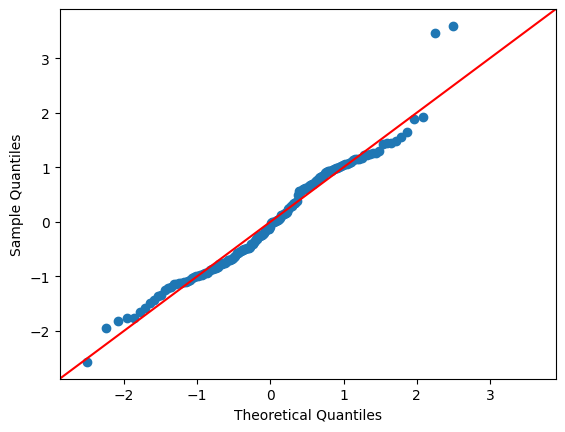

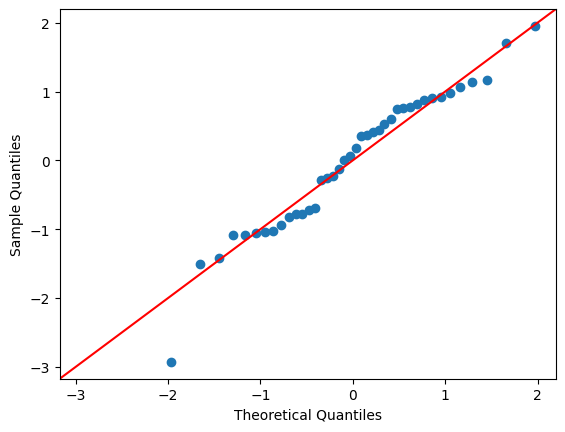

In [9]:
import statsmodels.api as sm
from scipy.stats import norm
sm.qqplot((residuals_for_training - residuals_for_training.mean())/residuals_for_training.std(), line = '45');
sm.qqplot((residuals - residuals.mean())/residuals.std(), line = '45');

We can see that the risiduals are not normaly distributed (the points are not alligned on the line)

which means our model would not be able to capture all the patterns in our data

### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [10]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [11]:
# Defining the pipeline for our polynomial regression model
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

#### Tuning the degree hyper-parameter using GridSearch

In [12]:
from sklearn.model_selection import GridSearchCV

# Defining the grid search parameters
degrees = range(2, 6)
param_grid = {'poly__degree': degrees}

# Declaring and training a GridSearch instance
search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=8, scoring = 'neg_mean_squared_error')
search.fit(X_train,y_train)

# Printing the results
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))

print()
print("Best parameters set found on development set:")
print(search.best_params_)
print()
x = search.best_params_['poly__degree']

# Find the optimum degrees
print(f"Best parameter: {x}" )
# Print the GridSearchCV score
print(f"search score: {search.best_score_}")

-5725.090 (+/-3345.874) for {'poly__degree': 2}
-11.083 (+/-8.818) for {'poly__degree': 3}
-0.225 (+/-0.201) for {'poly__degree': 4}
-30.715 (+/-111.733) for {'poly__degree': 5}

Best parameters set found on development set:
{'poly__degree': 4}

Best parameter: 4
search score: -0.22486816833459009


In [13]:
y_pred_poly = search.predict(X_test)

In [14]:
#evaluating our model
print_metrics(y_test, y_pred_poly)

Mean Squared Error: 0.15040937414109895
Root Mean Squared Error: 0.3878264742653587
Mean Absolute Error: 0.29594243338186826
r2 score: 0.9999961905635782


We can see that our polynomial model outperforms the previous linear model

#### Save the model

In [15]:
import pickle

# Save the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

In [16]:
with open('/content/poly_optimized_model.sav', 'rb') as handle:
    b = pickle.load(handle)

print_metrics(y_test, b.predict(X_test))

Mean Squared Error: 0.15040937414109895
Root Mean Squared Error: 0.3878264742653587
Mean Absolute Error: 0.29594243338186826
r2 score: 0.9999961905635782


### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

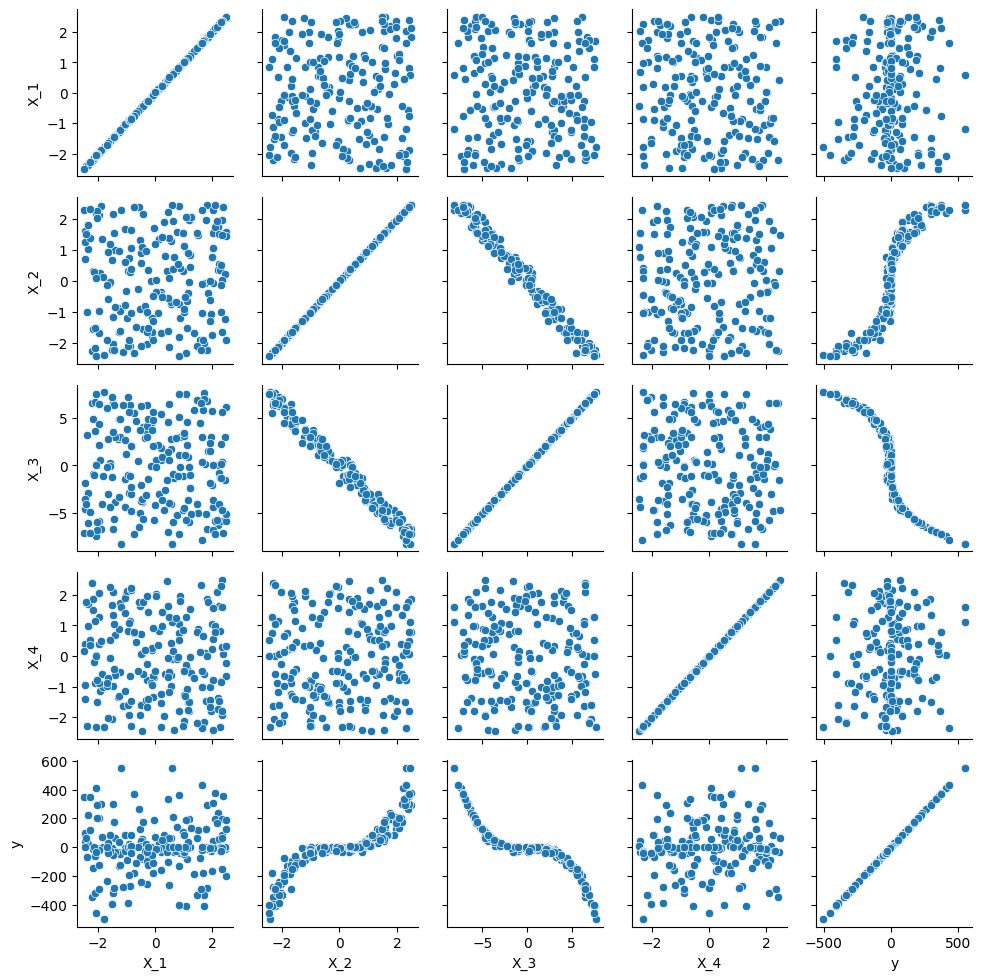

In [17]:
# ploting a PairGrid between the features
g = sns.PairGrid(df,height = 2)
g.map(sns.scatterplot)
plt.show()

We can see that X_2 and X_3 are dependant since they have a linear function in their plot

## Task 2

### Data processing
#### Loading the dataset

In [18]:
import pandas as pd

#### Exploring the dataset  and removing 2 redundant features

In [19]:
df = pd.read_csv('/content/pokemon_modified.csv')

In [20]:
df.head(10)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0
5,0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,...,78,Charizard,88.1,fire,159,115,100,90.5,1,0
6,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,44,Squirtle,88.1,water,50,64,43,9.0,1,0
7,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,59,Wartortle,88.1,water,65,80,58,22.5,1,0
8,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,79,Blastoise,88.1,water,135,115,78,85.5,1,0
9,1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,...,45,Caterpie,50.0,bug,20,20,45,2.9,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [22]:
df.describe().T # transpose to show all the columns conveniantly

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


In [23]:
# print the categorical variables in the dataset of type 'object'
df.select_dtypes(include=['object'])

,classification,name,type1
0,Seed Pokémon,Bulbasaur,grass
1,Seed Pokémon,Ivysaur,grass
2,Seed Pokémon,Venusaur,grass
3,Lizard Pokémon,Charmander,fire
4,Flame Pokémon,Charmeleon,fire
...,...,...,...
796,Launch Pokémon,Celesteela,steel
797,Drawn Sword Pokémon,Kartana,grass
798,Junkivore Pokémon,Guzzlord,dark
799,Prism Pokémon,Necrozma,psychic


In [24]:
# we should drop the two categorical columns 'name' and 'categorical' because they are unrelated to the target variable in a direct way
df = df.drop(['name','classification'], axis = 1)

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [25]:
from sklearn.model_selection import train_test_split

print('% of positive samples in whole data:', sum(df['is_legendary'] == 1) / len(df))

# split feature and target
data_label = df.loc[:,"is_legendary"]
data_feature = df.drop(['is_legendary'], axis = 1)

# We use stratify parameter to make sure our test and train data have the same percentage of each class
X_train, X_test, y_train, y_test = train_test_split(data_feature, data_label, test_size=0.2, random_state = 123, stratify= df['is_legendary'])

% of positive samples in whole data: 0.08739076154806492


<Axes: xlabel='is_legendary', ylabel='count'>

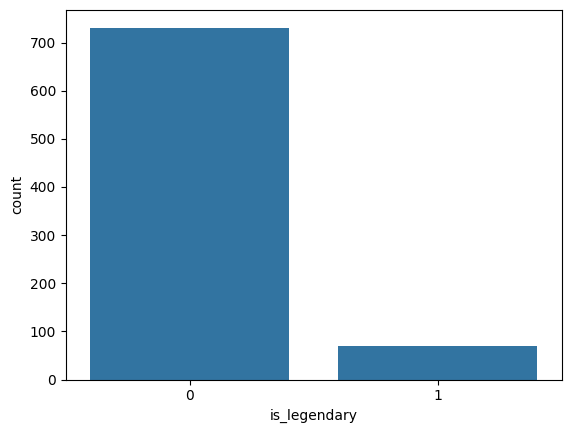

In [26]:
sns.countplot(data = df, x= 'is_legendary')

We can clearly see that our dataset is unbalanced



In [27]:
print('% of positive samples in train set:', sum(y_train== 1) / len(X_train))
print('% of positive samples in test set:', sum(y_test== 1) / len(X_test))

% of positive samples in train set: 0.0875
% of positive samples in test set: 0.08695652173913043


#### Checking for missing values

In [28]:
df.isnull().sum()

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
defense               0
experience_growth     0
height_m             20
hp                    0
percentage_male      98
type1                 0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64

#### Impute the missing values

In [29]:
from sklearn.impute import SimpleImputer

# Here we define a SimpleImputer instance
imputer = SimpleImputer(strategy = 'most_frequent')

# Applying the imputer on our data
imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(imputer.transform(X_test))

# Imputation removed column names; we put them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns


#### Double check that there are no missing values

In [30]:
print(imputed_X_train.isnull().sum().sum())
print(imputed_X_test.isnull().sum().sum())

0
0


#### Encode categorically

In [31]:
# print the number of unique classes to see if one-hot encoding is appropriate
df['type1'].nunique()

17

17 is not very huge so we can use one-hot encoding

In [32]:
# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df
# This code is taken from lab_3_solution notebook from our course

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = np.False_)
feature_names = ['type1']
encoder.fit(X_train[feature_names])
x_train = ohe_new_features(imputed_X_train, feature_names, encoder)
x_test = ohe_new_features(imputed_X_test, feature_names, encoder)


In [34]:
# print one row of our dataset to check how the features look like after encoding
x_test.sample()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
103,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale the data

In [35]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Defining a MINMAXScaler instance
scaler = MinMaxScaler()
scaler.fit(x_train)

# Applying the scaler on both train and test features
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [36]:
x_train.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,0.197396,0.217813,0.479687,0.267773,0.218021,0.267383,0.232292,0.247813,0.250586,0.210729,...,0.037500,0.092188,0.039062,0.031250,0.126562,0.037500,0.071875,0.057813,0.032813,0.142187
std,0.158589,0.122039,0.179597,0.162210,0.139159,0.184832,0.176400,0.158848,0.143231,0.208670,...,0.190132,0.289517,0.193895,0.174129,0.332742,0.190132,0.258483,0.233571,0.178285,0.349516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.066667,0.200000,0.500000,0.125000,0.200000,0.125000,0.066667,0.200000,0.250000,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.200000,0.500000,0.250000,0.200000,0.250000,0.200000,0.200000,0.250000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.200000,0.200000,0.500000,0.250000,0.200000,0.500000,0.200000,0.200000,0.250000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-37-a5316789d428>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = [2,2])


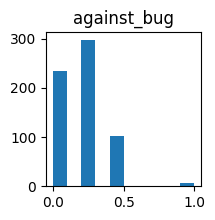

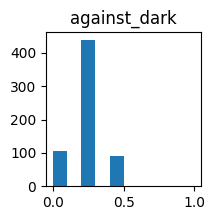

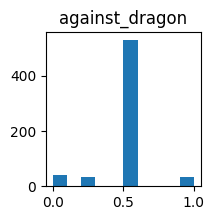

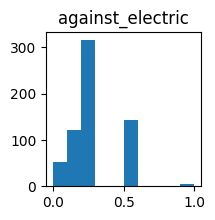

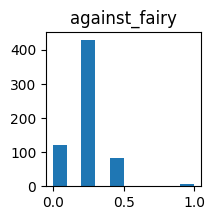

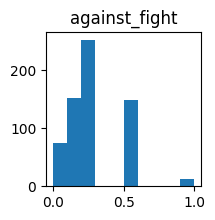

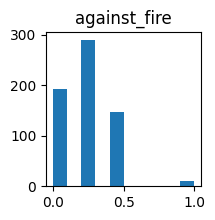

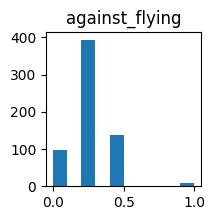

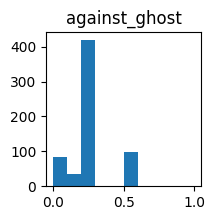

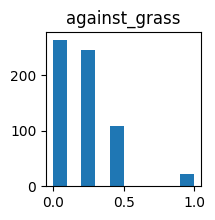

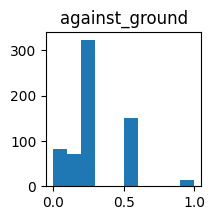

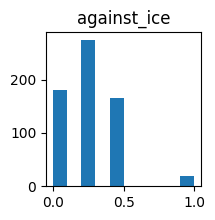

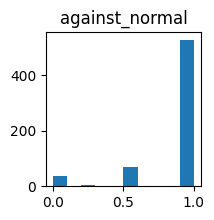

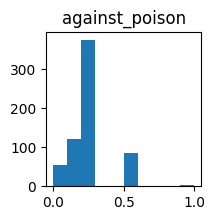

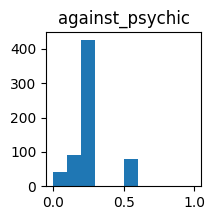

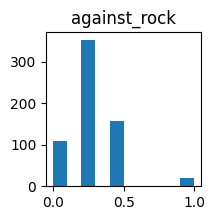

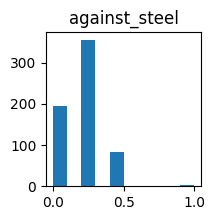

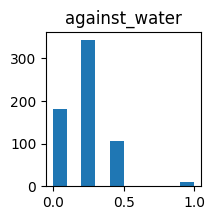

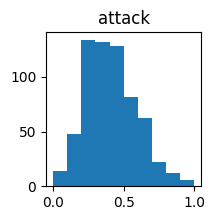

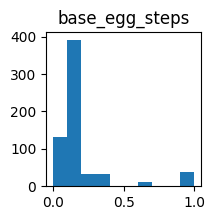

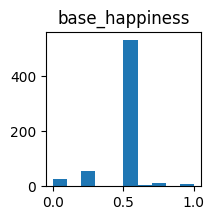

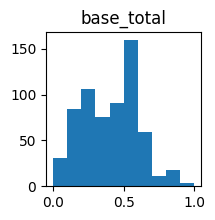

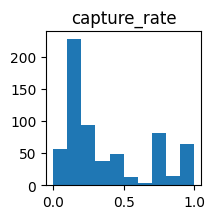

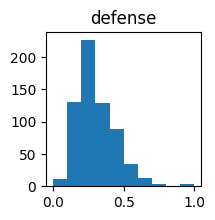

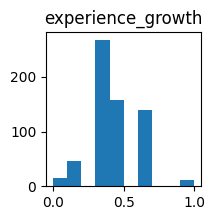

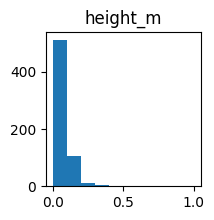

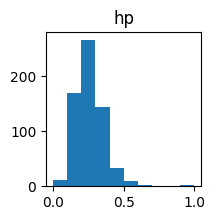

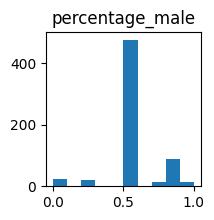

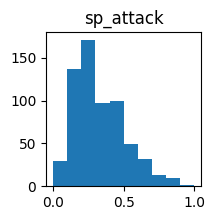

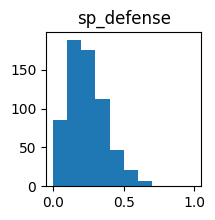

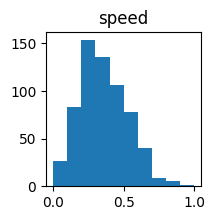

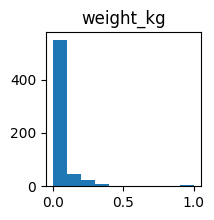

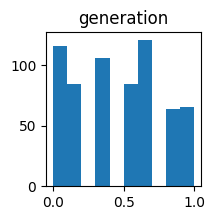

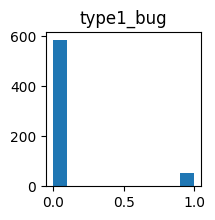

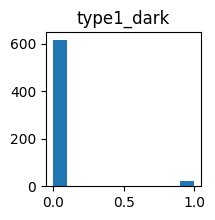

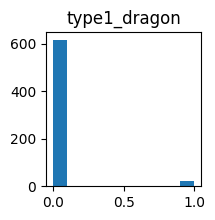

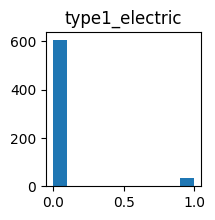

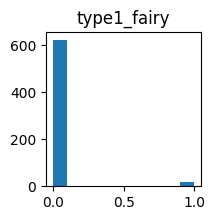

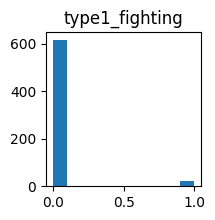

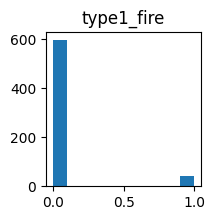

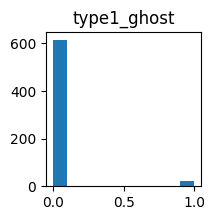

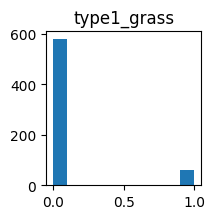

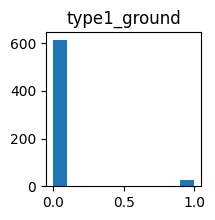

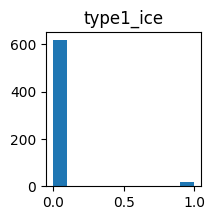

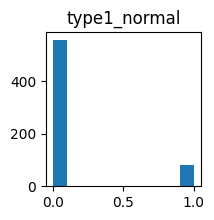

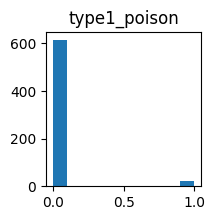

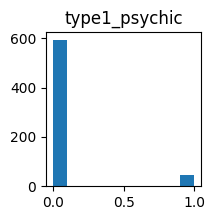

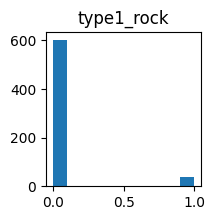

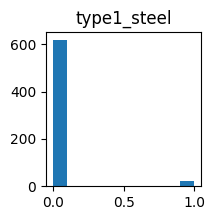

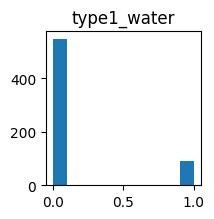

In [37]:
# here we plot the distribution of all features
for i in x_train.columns:
    plt.figure(figsize = [2,2])
    plt.title(f'{i}')
    plt.hist(x_train[i])

#### Correalation Matrix

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

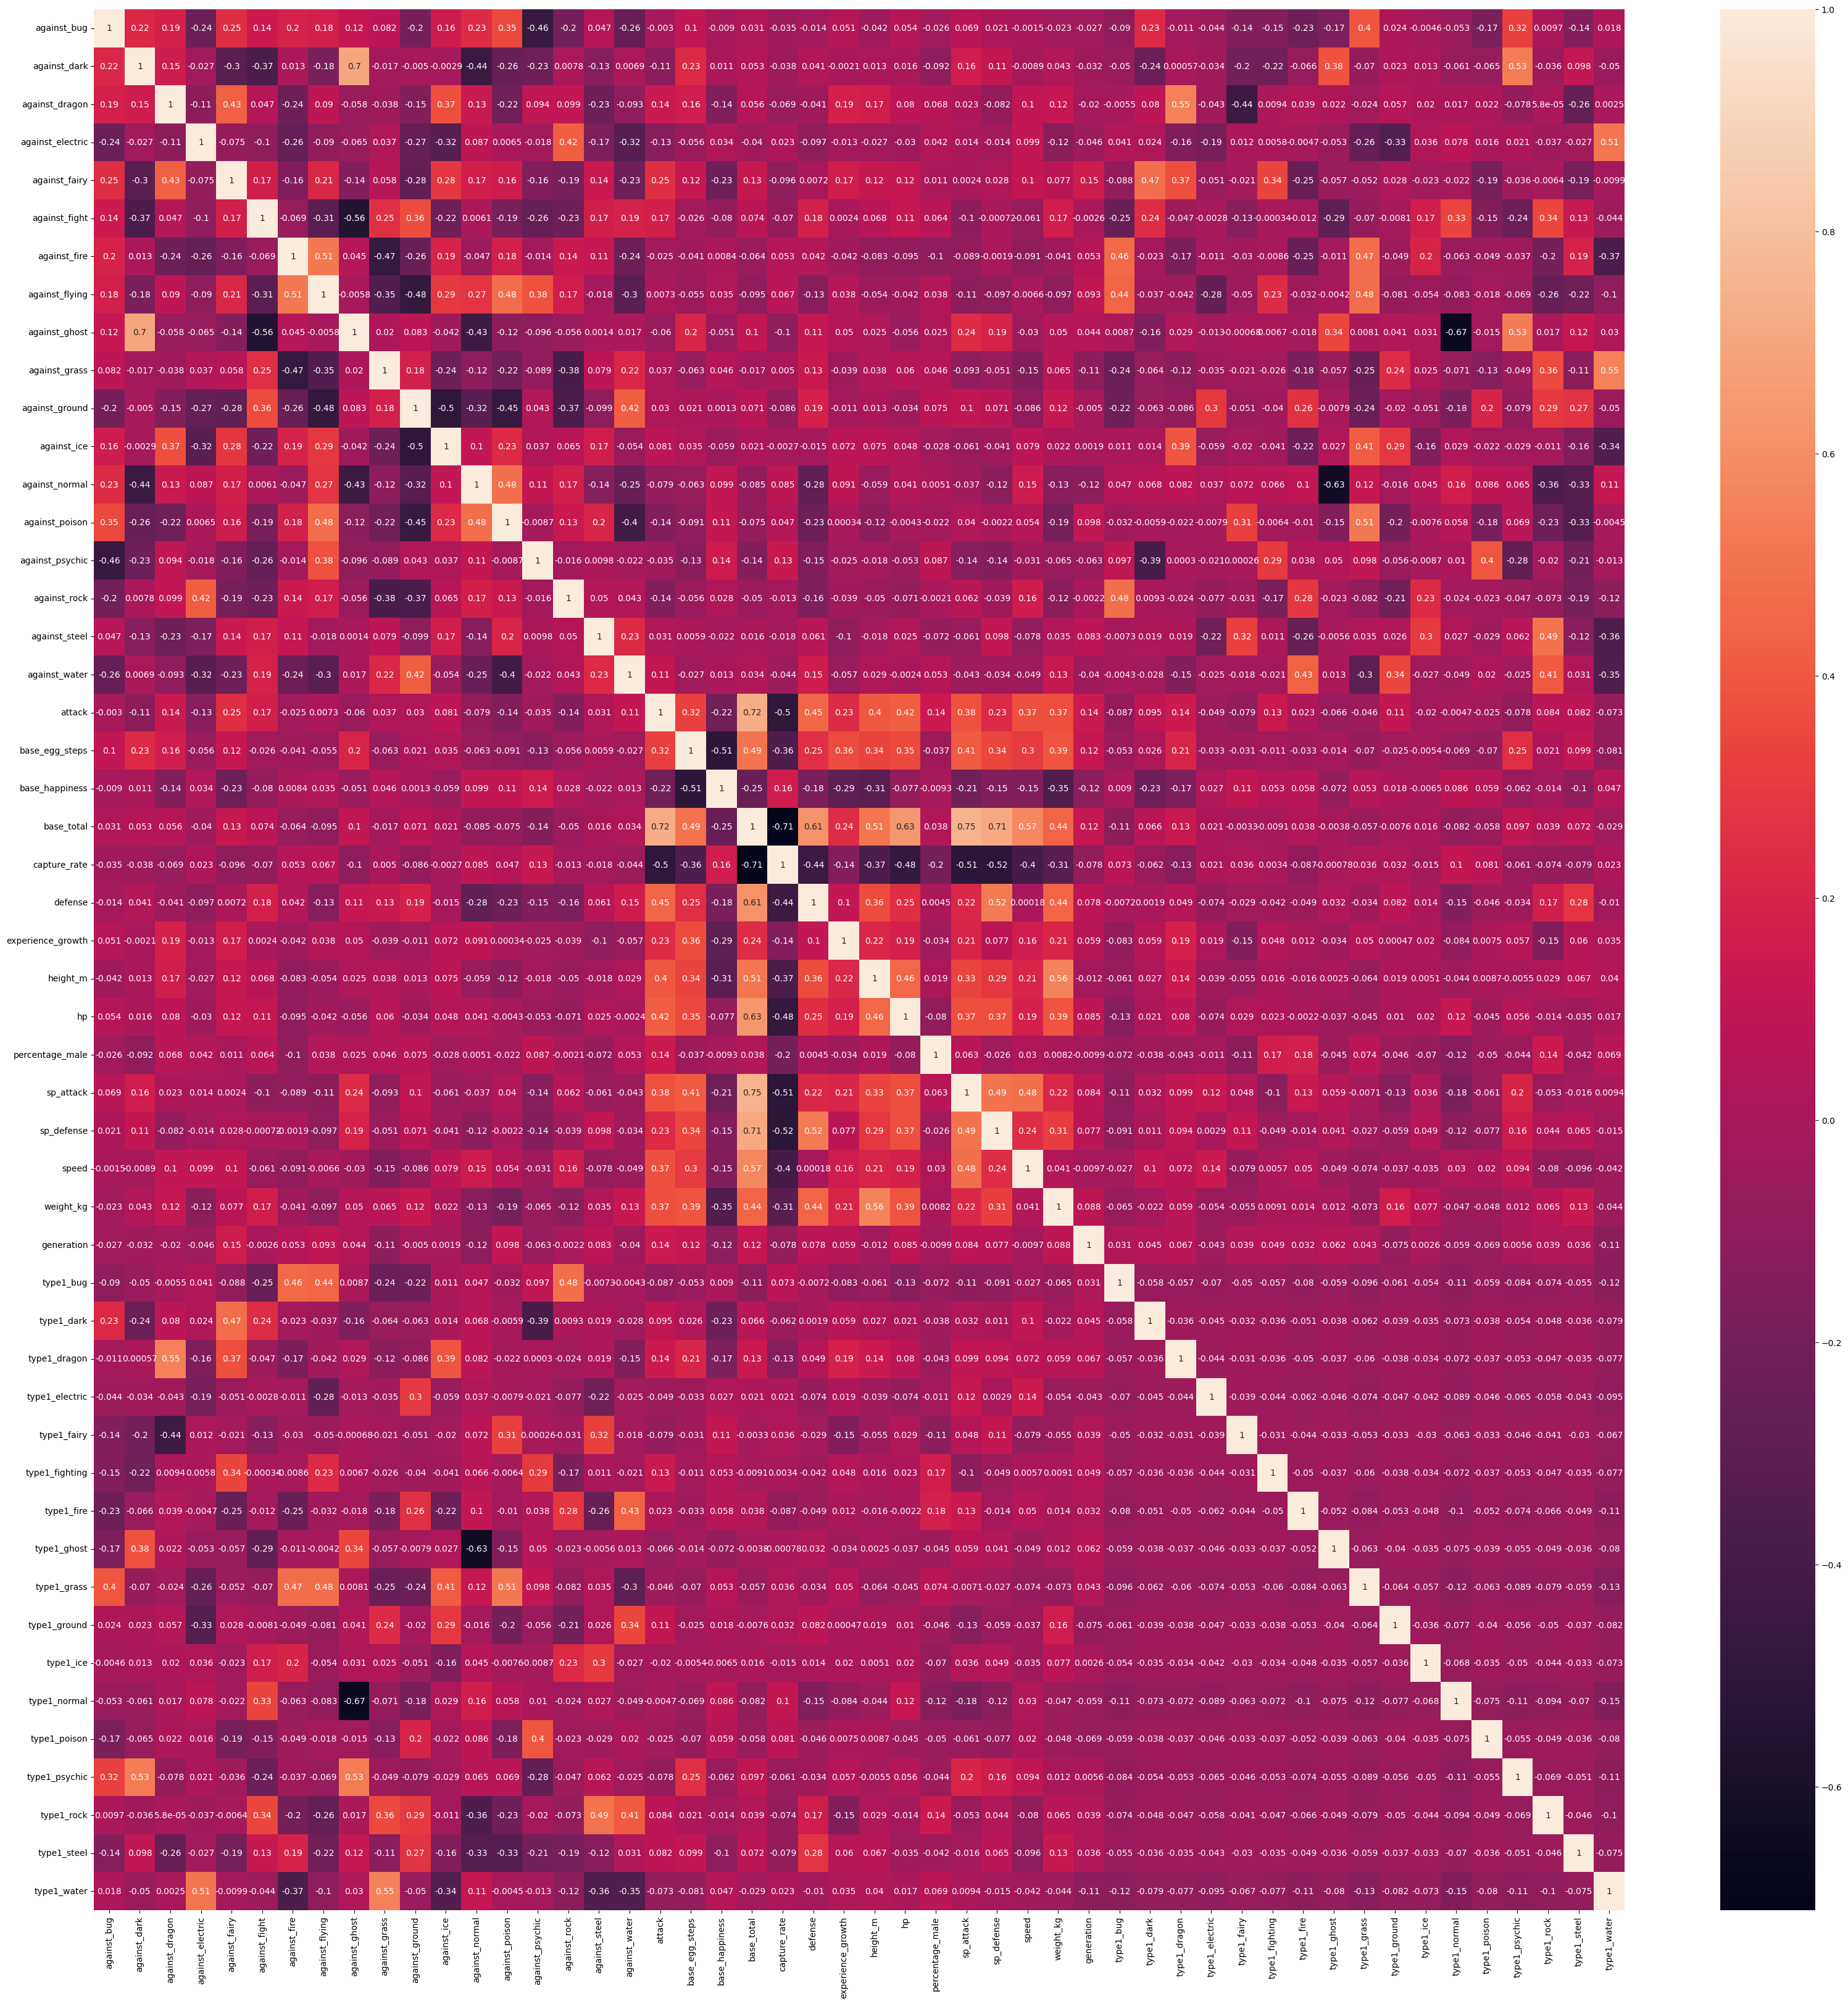

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
corr_matrix = x_train.corr()

# plot the correlation matrix as a heatmap using seaborn
sns.heatmap(corr_matrix, annot = True)

plt.show()

We can see that we have some features which are correlated with other features such as 'capture_rate'

We can choose to keep those features that have correlation levels below 0.7 (absolute)

And to remove those features above the threshold.



### Model fitting and Comparison

In [39]:
def print_highly_correlated(df, threshold=0.7):
    corr_df = df.corr() # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value

    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            cols = df.columns
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

# this function is taken from https://gist.github.com/wjptak/88575bbc5dde446e1186ffd41475c0f1

In [40]:
print_highly_correlated(x_train)

base_total and sp_attack = 0.749
attack and base_total = 0.723
base_total and capture_rate = -0.711
base_total and sp_defense = 0.706


We will remove the feature base_total since it is correlatd with all of those 4 others

In [41]:
x_train = x_train.drop(['base_total'],axis = 1)

In [42]:
x_test = x_test.drop(['base_total'],axis = 1)

#### Tuning LR model

In [43]:
# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score
def print_clf_metrics(y_actual, y_pred):
    print(f'Testing accuracy = {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Testing precision = {metrics.precision_score(y_test, y_pred)}')
    print(f'Testing recall = {metrics.recall_score(y_test, y_pred)}')
    print(f'Testing F1-score = {metrics.f1_score(y_test, y_pred)}')

In [44]:
# Here we specify GridSearchCV parameters for LR
parameters = {
    'C': np.logspace(-3,3,7),
    'penalty' : ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declaring and training logistic regression inside GridSearchCV with the parameters above
# Set max_iter=1000 in LR constructor
lr_clf_gs = GridSearchCV(estimator = LogisticRegression(max_iter=1000),
                               cv=7, scoring='f1',
                               param_grid=parameters
                               )
# lr_clf_gs.fit(x_train, y_train)

In [46]:
from sklearn.metrics import accuracy_score
lr_clf_gs.fit(x_train, y_train)
means = lr_clf_gs.cv_results_['mean_test_score']
stds = lr_clf_gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, lr_clf_gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(lr_clf_gs.best_params_)

y_pred = lr_clf_gs.predict(x_test)
print(accuracy_score(y_test, y_pred))

nan (+/-nan) for {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.000 (+/-0.000) for {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.000 (+/-0.000) for {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000 (+/-0.000) for {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000 (+/-0.000) for {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000 (+/-0.000) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}
0.762 (+/-0.169) f

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
98 fits failed out of a total of 294.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [47]:
print("Tuned Hyperparameters :",lr_clf_gs.best_params_)
print("Accuracy :",accuracy_score(y_test, y_pred))

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9937888198757764


#### Construct a LR with the best params and Evaluate the LR with the best params

In [48]:
x_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.2,0.200000,0.5,0.250,0.200000,0.500,0.066667,0.066667,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,0.2,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.2,0.200000,0.5,0.000,0.200000,0.125,0.466667,0.466667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Here we pass the best parametrs dictionary to the constructor
lr_clf = LogisticRegression(max_iter = 1000, **lr_clf_gs.best_params_)
lr_clf.fit(x_train, y_train)
lr_y_pred = lr_clf.predict(x_test)
lr_clf.get_params()

{'C': 10.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
print_clf_metrics(y_test, lr_y_pred)

Testing accuracy = 0.9937888198757764
Testing precision = 0.9333333333333333
Testing recall = 1.0
Testing F1-score = 0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [51]:
# creating a list of feature weights
feature_weights = [a for a in zip(list(x_train.columns), lr_clf.coef_[0])]
feature_weights.sort(key = lambda x: abs(x[1]))
print(len(feature_weights))
print('top 5 ignored features: ')
print(*feature_weights[:5], sep = '\n')

print()
print()
x
print('top 5 most influencing features: ')
print(*feature_weights[-5:], sep = '\n')

49
top 5 ignored features: 
('against_bug', 0.0)
('against_dark', 0.0)
('against_electric', 0.0)
('against_fairy', 0.0)
('against_fire', 0.0)


top 5 most influencing features: 
('experience_growth', 8.19691835046687)
('speed', 8.565369549719343)
('type1_normal', -9.380778364007194)
('capture_rate', -11.927040222741644)
('base_egg_steps', 13.011313984823142)


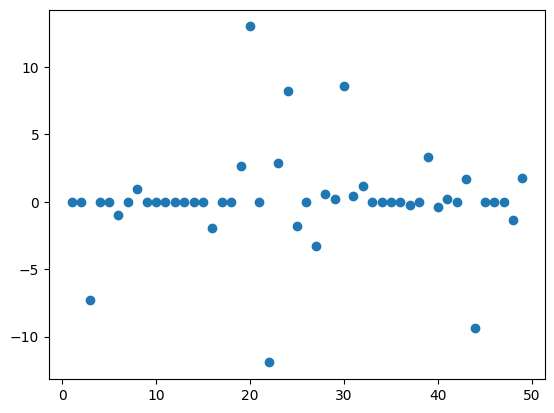

In [52]:
# plot the weights of the features
plt.scatter(np.linspace(1,len(lr_clf.coef_[0]),49),lr_clf.coef_[0])
plt.show()

In [53]:
# feature_weights

#### Tuning KNN model

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Declaring and training knn inside GridSearchCV
param_grid = {
   'n_neighbors' :list(range(1, 15)),
   'weights': ['uniform','distance'],
   'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

knn_clf_gs = GridSearchCV(estimator = KNeighborsClassifier(),
                               cv=7, scoring='f1',
                               param_grid=param_grid
                               )

knn_clf_gs.fit(x_train, y_train)

means = knn_clf_gs.cv_results_['mean_test_score']
stds = knn_clf_gs.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, knn_clf_gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))

print()
y_pred = knn_clf_gs.predict(x_test)


print("Tuned Hyperparameters :", knn_clf_gs.best_params_)
print("Accuracy :",accuracy_score(y_test, y_pred))

0.621 (+/-0.260) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.621 (+/-0.260) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.486 (+/-0.345) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.621 (+/-0.260) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.573 (+/-0.239) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.588 (+/-0.266) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.412 (+/-0.459) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.567 (+/-0.297) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.450 (+/-0.492) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.450 (+/-0.492) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.334 (+/-0.366) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.429 (+/-0.487) for {'metric': 'euclidean', 'n_neighbors': 

#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [55]:
knn_clf = KNeighborsClassifier(**knn_clf_gs.best_params_)
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'chebyshev',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'distance'}

In [56]:
knn_clf.fit(x_train, y_train)
knn_y_pred = knn_clf.predict(x_test)

print_clf_metrics(y_test, knn_y_pred)

Testing accuracy = 0.9813664596273292
Testing precision = 1.0
Testing recall = 0.7857142857142857
Testing F1-score = 0.88


#### Fitting GNB to the data and evaluating on the test dataset

In [57]:
from sklearn.naive_bayes import GaussianNB

# Declaring and training GaussianNB. No hyperparameters tuning
gauss_nb_clf = GaussianNB()
gauss_nb_clf.fit(x_train, y_train)
gauss_y_pred = gauss_nb_clf.predict(x_test)

print_clf_metrics(y_test, gauss_y_pred)

Testing accuracy = 0.9316770186335404
Testing precision = 0.56
Testing recall = 1.0
Testing F1-score = 0.717948717948718


#### Which metric is most appropriate for this task and why?

f1 score is considerd the most appropriate metric for this task since we have no side of classification more important than the other (false negatives are as bad as false positive)

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [58]:
print('lr:')
print_clf_metrics(y_test, lr_y_pred)
print()

print('knn')
print_clf_metrics(y_test, knn_y_pred)
print()

print('GNB')
print_clf_metrics(y_test, gauss_y_pred)

lr:
Testing accuracy = 0.9937888198757764
Testing precision = 0.9333333333333333
Testing recall = 1.0
Testing F1-score = 0.9655172413793104

knn
Testing accuracy = 0.9813664596273292
Testing precision = 1.0
Testing recall = 0.7857142857142857
Testing F1-score = 0.88

GNB
Testing accuracy = 0.9316770186335404
Testing precision = 0.56
Testing recall = 1.0
Testing F1-score = 0.717948717948718


We can see that the LR model performs best considering the f1 score metric

## 5. Bonus Task

#### Loading the Dataset

In [59]:
import pandas as pd

train_data = pd.read_csv('/content/bonus_train.csv')
test_data = pd.read_csv('/content/bonus_test.csv')

In [60]:
train_data.head(10)

,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0
5,49.644356,0.766883,349.388946,2
6,39.577094,2.185494,403.525186,2
7,42.816085,6.029742,307.918765,1
8,17.726875,5.797036,159.409780,0
9,-8.783769,5.914642,101.435329,0


In [61]:
# check the number of classes in our dataset
train_data['target'].nunique()

3

In [62]:
data_label_tr = train_data.loc[:,"target"]
data_feature_tr = train_data.drop(['target'], axis = 1)
data_label_te = test_data.loc[:,"target"]
data_feature_te = test_data.drop(['target'], axis = 1)

In [63]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_feature_tr, data_label_tr, test_size = 0.2, stratify = train_data['target'])

####  Plot the data using the pairplot in sns

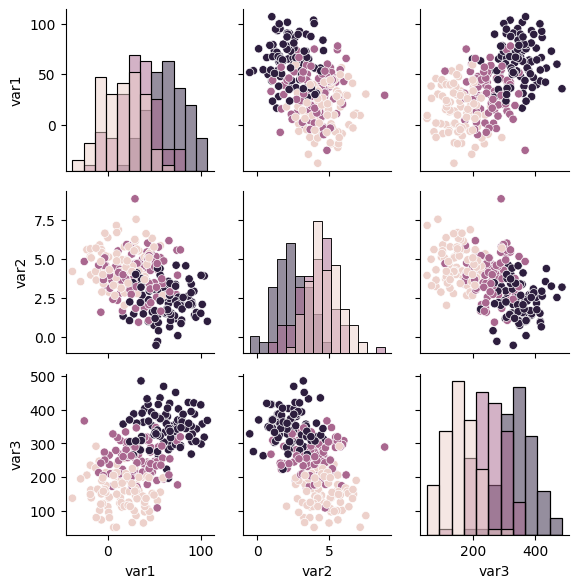

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
# ploting a PairGrid between the features
g = sns.PairGrid(train_data,height = 2, hue = 'target')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

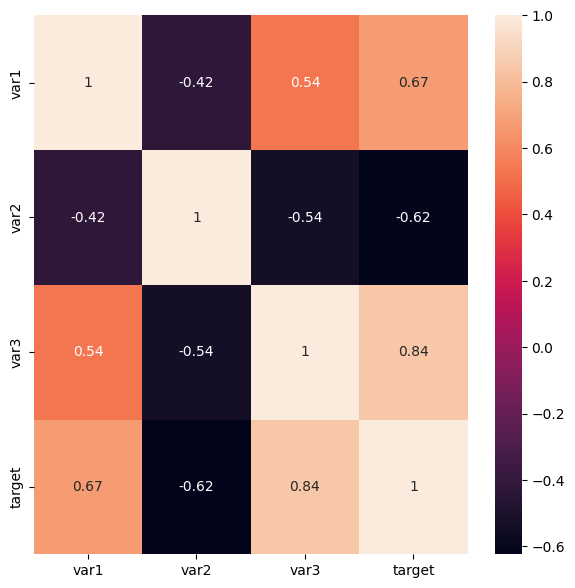

In [65]:
plt.figure(figsize=(7,7))
corr_matrix = train_data.corr()

# plot the correlation matrix as a heatmap using seaborn
sns.heatmap(corr_matrix, annot = True)

plt.show()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [66]:
# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score
def print_clf_metrics_multi(y_actual, y_pred):
    print(f'Testing accuracy = {metrics.accuracy_score(y_test, y_pred)}')
    print(f'''Testing precision = {metrics.precision_score(y_test, y_pred, average = 'macro')}''')
    print(f'''Testing recal = {metrics.recall_score(y_test, y_pred, average = 'macro')}''')
    print(f'''Testing F1-score = {metrics.f1_score(y_test, y_pred, average = 'macro')}''')

In [67]:
# TODO Write your code here
ovr_lr = LogisticRegression(multi_class = 'ovr', max_iter = 1000).fit(X_train, y_train)
ovr_lr_y_pred = ovr_lr.predict(X_test)
print_clf_metrics_multi(y_test, ovr_lr_y_pred)

Testing accuracy = 0.7592592592592593
Testing precision = 0.7520467836257311
Testing recal = 0.7592592592592592
Testing F1-score = 0.7529922266764372


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [68]:
# TODO Write your code here
multi_lr = LogisticRegression(multi_class = 'multinomial', max_iter = 1000).fit(X_train, y_train)
multi_lr_y_pred = multi_lr.predict(X_test)
print_clf_metrics_multi(y_test, multi_lr_y_pred)

Testing accuracy = 0.7592592592592593
Testing precision = 0.7556472881550281
Testing recal = 0.7592592592592592
Testing F1-score = 0.7570713570713572


#### Using gridsearch to tune the C value and multi class

In [69]:
# TODO Write your code here
params = {
    'C': np.logspace(-10,10,7),
    'multi_class' : ['ovr', 'multinomial']
}
grid_search_clf = GridSearchCV(estimator = LogisticRegression(max_iter=1000),
                               cv=7, scoring='f1_macro',
                               param_grid=params
                               )
# grid_search_clf.fit(X_train, y_train)

In [70]:
from sklearn.metrics import accuracy_score
grid_search_clf.fit(X_train, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.266 (+/-0.245) for {'C': 1e-10, 'multi_class': 'ovr'}
0.165 (+/-0.008) for {'C': 1e-10, 'multi_class': 'multinomial'}
0.614 (+/-0.190) for {'C': 2.1544346900318867e-07, 'multi_class': 'ovr'}
0.632 (+/-0.209) for {'C': 2.1544346900318867e-07, 'multi_class': 'multinomial'}
0.817 (+/-0.143) for {'C': 0.0004641588833612782, 'multi_class': 'ovr'}
0.824 (+/-0.111) for {'C': 0.0004641588833612782, 'multi_class': 'multinomial'}
0.839 (+/-0.050) for {'C': 1.0, 'multi_class': 'ovr'}
0.871 (+/-0.061) for {'C': 1.0, 'multi_class': 'multinomial'}
0.844 (+/-0.065) for {'C': 2154.4346900318865, 'multi_class': 'ovr'}
0.871 (+/-0.061) for {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
0.844 (+/-0.065) for {'C': 4641588.833612791, 'multi_class': 'ovr'}
0.871 (+/-0.061) for {'C': 4641588.833612791, 'multi_class': 'multinomial'}
0.844 (+/-0.065) for {'C': 10000000000.0, 'multi_class': 'ovr'}
0.871 (+/-0.061) for {'C': 10000000000.0, 'multi_class': 'multinomial'}

Best parameters set found on de

In [71]:
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred))

Tuned Hyperparameters : {'C': 1.0, 'multi_class': 'multinomial'}
Accuracy : 0.7592592592592593


#### Comment on why one multi_class technique was better than the other

OVR usually performs worse due to the unbalance between the "rest' and the compared class

That is why here the multinomial method performed better


Also in casses with more than 3 classes OVR would have less combinations (N) compared to multinomial (N*(N-1)/2) which is good computationaly but could lead to worse results

#### Create LR with the best params

In [72]:
best_params_ =  grid_search_clf.best_params_

In [73]:
# TODO Write your code here
multi_lr = LogisticRegression(max_iter = 1000, **best_params_).fit(X_train, y_train)
multi_lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Visualize the decision boundaries

We drop var2 since it has the lowest correlation with the target as seen in the correlation matrix above

In [74]:
two_features = X_train.drop(['var2'], axis = 1)

In [75]:
two_features_test = X_test.drop(['var2'], axis = 1)

Testing accuracy = 0.7592592592592593
Testing precision = 0.7513227513227513
Testing recal = 0.7592592592592592
Testing F1-score = 0.7518777518777519


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


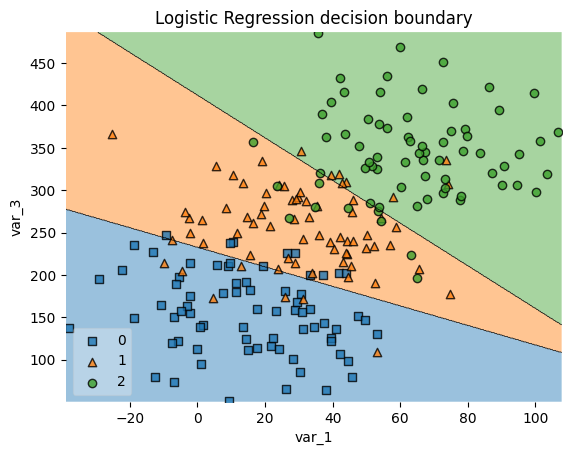

In [76]:
from mlxtend.plotting import plot_decision_regions
# TODO Write your code here
multi_lr = LogisticRegression(max_iter = 1000, **best_params_).fit(two_features, y_train)
multi_lr_y_pred = multi_lr.predict(two_features_test)
print_clf_metrics_multi(y_test, multi_lr_y_pred)
plot_decision_regions(two_features.to_numpy(), y_train.to_numpy(), clf = multi_lr, legend = 3)

plt.xlabel('var_1')
plt.ylabel('var_3')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?

This model is generaly good because of the evaluation metrics and the boundries

But we can acheive a better decision boundry if we increase the flexibility of our model to have a non-linear boundry